In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [3]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_input.shape

(60000, 28, 28)

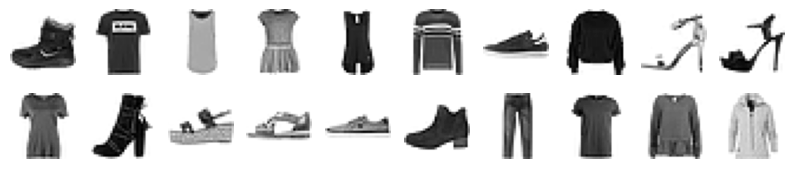

In [5]:
fig,axs = plt.subplots(2,10,figsize=(10,2))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off')

In [6]:
# 표준화작업
# train_scaled = train_input/255
# 1차원행렬로 변경
# train_scaled = train_scaled.reshape(-1,28*28)

# 합성곱 신경망은 3차원 행렬이 되어야 함.
train_scaled = train_input.reshape(-1,28,28,1)/255

In [7]:
train_scaled.shape

(60000, 28, 28, 1)

In [8]:
# train세트 - train세트,검증세트,test세트

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

1차 합성곱 층을 생성

In [9]:
# 1차 합성곱 신경망
model = keras.Sequential()
# padding='same', 'valid':패딩사용하지 않음.
# input_shape = (28,28,1) , 사이즈28x28 그레이색상 1, (28,28,3) - 사이즈 28x28,RGB색상 3개
model.add( keras.layers.Conv2D( 32,kernel_size=(3,3),activation='relu',padding='same',
          input_shape=(28,28,1) ) )
model.add(keras.layers.MaxPooling2D(2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2차 합성곱 층을 생성

In [10]:
# 2차 합성곱 신경망 생성
model.add( keras.layers.Conv2D( 64,kernel_size=(3,3),activation='relu',padding='same') )
model.add(keras.layers.MaxPooling2D(2))

In [11]:
model.add(keras.layers.Flatten()) # 1차원행렬
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [12]:
model.summary()

# conv2d param사이즈 : kernel_size(3,3) x 깊이(1) x 필터(32개)+ 32개절편 - 3 x 3 x 1 x 32 + 32 = 320
# MaxPooling2D -> 사이즈가 절반으로 변경
# flatten : 1차원 행렬 14*14*32 = 6275

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

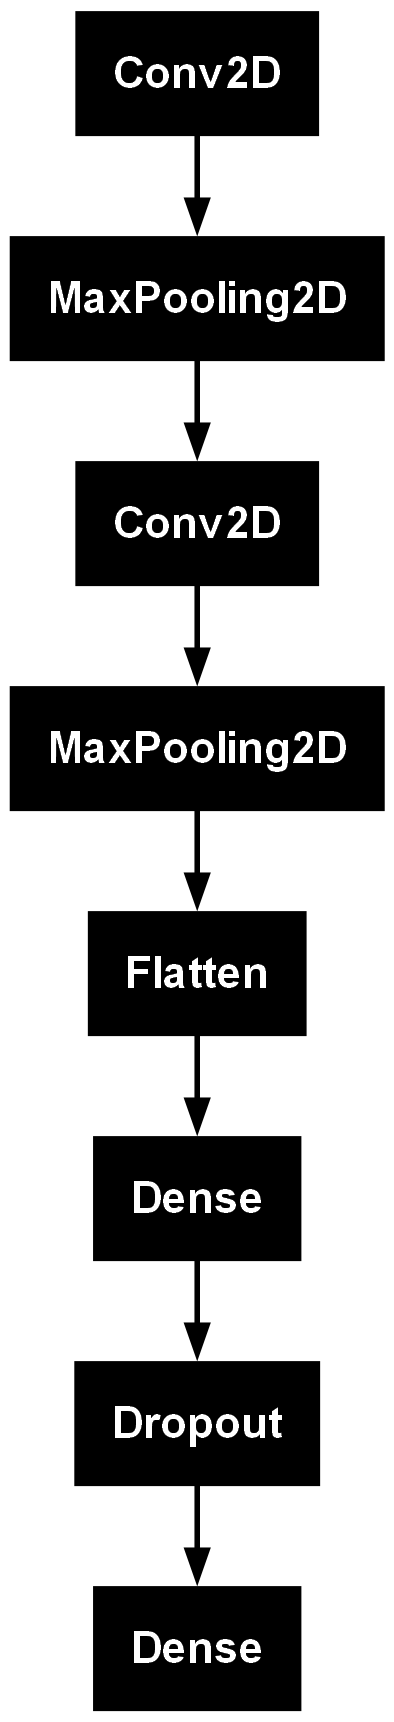

In [30]:
keras.utils.plot_model(model)

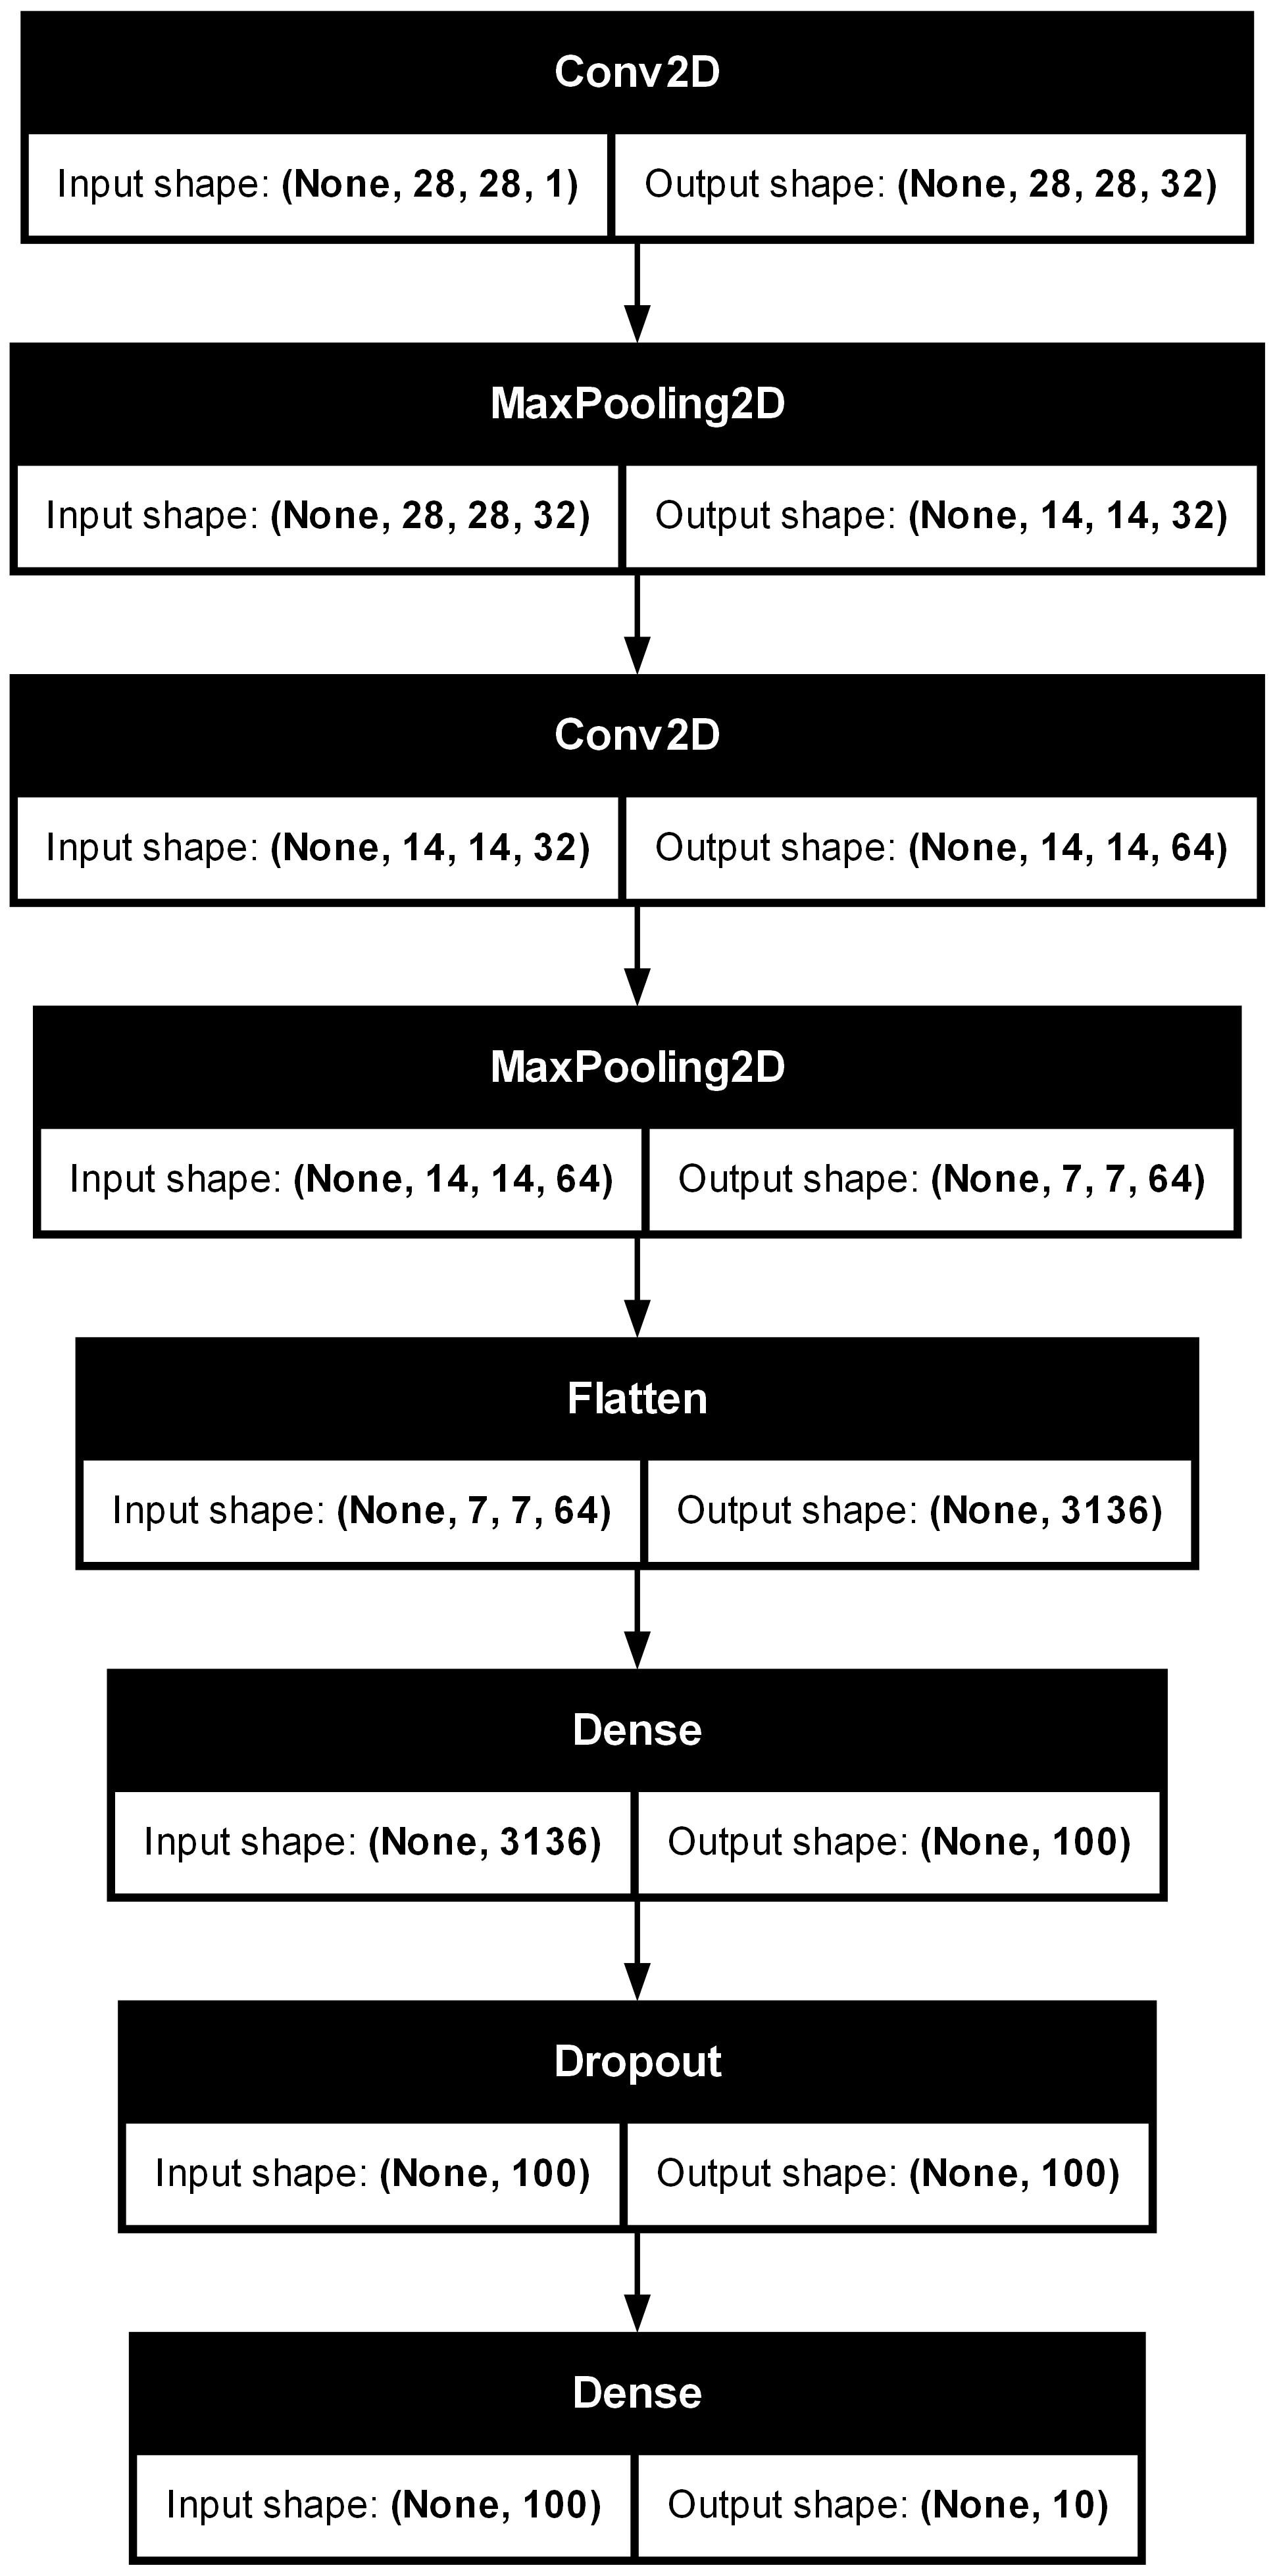

In [14]:
keras.utils.plot_model(model,show_shapes=True, to_file='cnn_a.png',dpi=300)

In [15]:
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb]
                    )


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7449 - loss: 0.7256 - val_accuracy: 0.8816 - val_loss: 0.3197
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8690 - loss: 0.3573 - val_accuracy: 0.8980 - val_loss: 0.2747
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8934 - loss: 0.3023 - val_accuracy: 0.9093 - val_loss: 0.2463
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9040 - loss: 0.2624 - val_accuracy: 0.9117 - val_loss: 0.2402
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9115 - loss: 0.2420 - val_accuracy: 0.9160 - val_loss: 0.2317
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9169 - loss: 0.2233 - val_accuracy: 0.9180 - val_loss: 0.2239
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9259 - loss: 0.2029 - val_accuracy: 0.9187 - val_loss: 0.2257
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9305 - loss: 0.1883 -

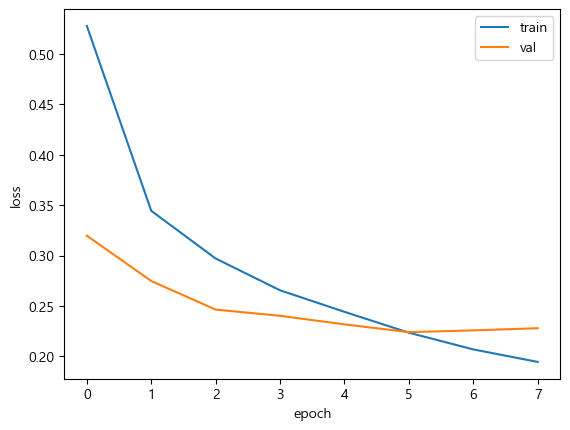

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [18]:
# stop위치 출력
early_stopping_cb.stopped_epoch

7

In [19]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9214 - loss: 0.2199


[0.22394685447216034, 0.9179999828338623]

In [20]:
# val_scaled[0].reshape(28,28)

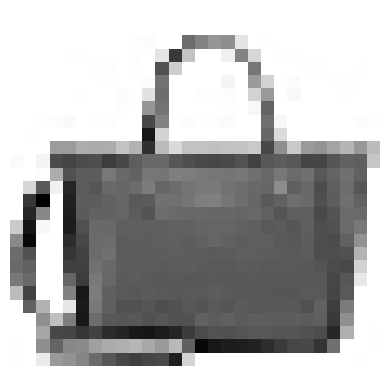

In [21]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [22]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬형태
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[2.8248493e-17 5.4173439e-23 1.8778014e-20 6.9133776e-19 7.7286611e-18
  1.8840827e-17 5.5867037e-17 9.3737131e-19 1.0000000e+00 2.4236966e-19]]


In [23]:
predict[0]

array([2.8248493e-17, 5.4173439e-23, 1.8778014e-20, 6.9133776e-19,
       7.7286611e-18, 1.8840827e-17, 5.5867037e-17, 9.3737131e-19,
       1.0000000e+00, 2.4236966e-19], dtype=float32)

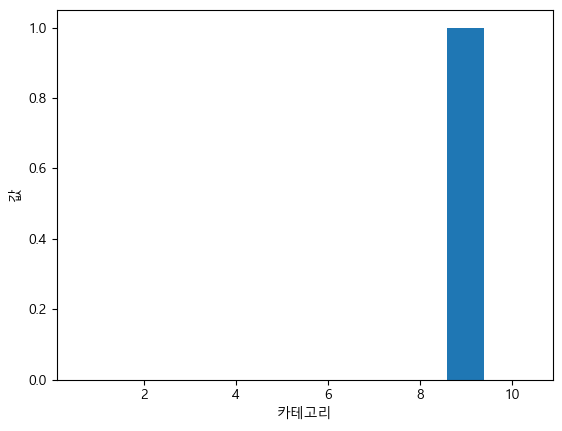

In [24]:
plt.bar(range(1,11),predict[0])
plt.xlabel('카테고리')
plt.ylabel('값')
plt.show()

In [25]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [26]:
print(classes[np.argmax(predict)])  # np.argmax 최대값의 index값을 리턴

가방


In [27]:
# test세트 검증
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [28]:
# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9113 - loss: 0.2565


[0.24946044385433197, 0.9101999998092651]

In [29]:
# 딥러닝 훈련
# 데이터전처리 train_scaled = train_input.reshape(-1,28,28,1)/255

# 모델결정 model = keras.Sequential()
# 합성곱 신경망 (CNN)
# 1차 합성곱 신경망 
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
#                                input_shape=(28,28,1))
# 최대풀링 model.add(keras.layers.MaxPooling2D(2))
# 2차 합성곱 신경망
# model.add( keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same') )
# model.add(keras.layers.MaxPooling2D(2))

# 인공신경망 훈련
# Flatten 추가  model.add(keras.layers.Flatten())
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.4)) # 40%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled,test_target)